# <span style="color:darkblue"> Lecture 23 - Practicing Time and Plots  </span>

<font size = "5">

In  this lecture we will practice working with time in Python

- There will be a quiz on this lecture


# <span style="color:darkblue"> I. Review of time commands </span>

<font size = "5">

Line plot: $\qquad \qquad \qquad \quad \ $ ``` plt.plot() ```

Parse string column to date: $\ $``` pd.to_datetime(data_column,format)```

Date to string:  $\qquad \qquad \quad \ $ ```.dt.strftime(format)```

Group by time period:
$\qquad \ \ $ ``` pd.Grouper(key='date', freq='m')```

Include group as column: $\quad$ ```.reset_index()```

Difference between periods: $\ $``` .diff() ```

Lag a periods: $\qquad \qquad \quad \ $ ``` .shift(1) ```

Between two periods (bool): $\ $ ```.between("date1","date2")```

Convert wide to long: $\qquad \quad $ ``` pd.melt(...) ```

Convert long to wide: $\qquad \quad $ ``` pd.pivot(...) ```

## <span style="color:darkblue"> II. Quiz Structure </span>

<font size = "5">

The day of the quiz I will ...
- Provide a dataset with information
- Give more specific instructions.
- Below, you will see the type of questions that will be asked.
- The idea is for you to apply known concepts to new data
- You have 50 minutes to complete the assignment

Questions

(exact wording may change in quiz, but exercise will be very similar)

The quiz will use a time series dataset



<font size = "5">

(a) Import a dataset, parse date column using wildcards <br>
$\quad$ (see Lecture 21), and sort dataset

(b) Line plots from multiple columns with a legend

(c) Compute growth rates for a time series

(d) Flag a subset of the data and produce a shaded plot <br>
$\quad$ as in Lecture 22

(e) Compute aggregate dataset by time period

(f) Convert a dataset to long format


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#a

long = pd.read_csv("data_raw/wdi_long.csv")
long["date"] = pd.to_datetime(long["year"], format = '%Y') #format look at graph in lecture 21
data_sorted = long.sort_values(['country_name', 'date'])

display(long["date"])

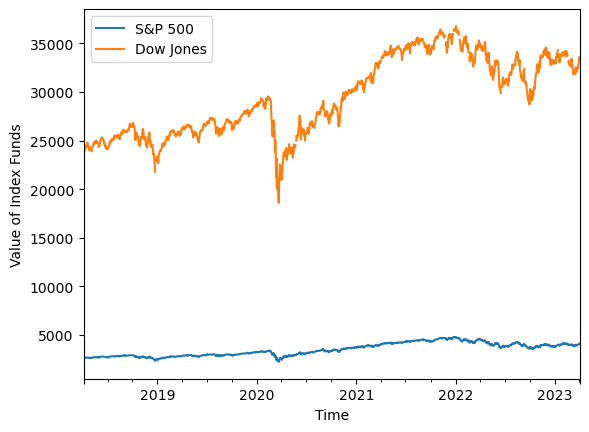

In [3]:
#b

financial = pd.read_csv("data_raw/financial.csv")
financial["date"] = pd.to_datetime(financial["date_str"])

financial[["date","sp500","djia"]].set_index("date").plot() #set_index: is the value of x, also need to have in y-axis
plt.xlabel("Time")
plt.ylabel("Value of Index Funds")
plt.legend(["S&P 500","Dow Jones"])


In [5]:
#c

financial["diff_sp500"] = financial["sp500"].diff()
financial["lag_sp500"]    = financial["sp500"].shift(1)
financial["growth_sp500"] = financial["diff_sp500"]* 100/financial["lag_sp500"]

display(financial[["growth_sp500"]])


,growth_sp500
0,NaN
1,0.686281
2,-2.192021
3,0.333657
4,1.672687
...,...
1300,1.423726
1301,0.571526
1302,1.443655
1303,0.369892


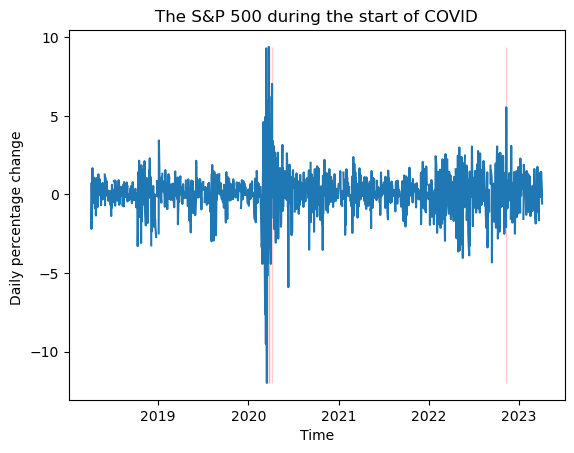

In [6]:
#d
financial["bool_period"]  = financial["date"].between("2020-03-01","2020-10-01") #
financial["bool_example"] = financial["growth_sp500"] > 5

# financial["bool_example2"] = (financial["growth_djia"] > 4) | (financial["growth_djia"] < -4)

plt.plot("date", "growth_sp500", data = financial)
plt.xlabel("Time")
plt.ylabel("Daily percentage change ")
plt.title("The S&P 500 during the start of COVID")

vec_y = financial["growth_sp500"]
plt.fill_between(x= financial["date"],
                 y1 = vec_y.min(),
                 y2 = vec_y.max(),
                 where = financial["bool_example"], # can change to bool_period
                 alpha = 0.2,color = "red")

plt.show()

In [7]:
month_config = pd.Grouper(key='date', freq='m') # year (y), month (m), week (w), day(d)

monthlydata = (financial
               .groupby(month_config) 
               .agg(sp500_mean = ("sp500","mean"))
               .reset_index())

monthlydata

,date,sp500_mean
0,2018-04-30,2659.463158
1,2018-05-31,2701.493636
2,2018-06-30,2754.352857
3,2018-07-31,2793.643333
4,2018-08-31,2857.820435
...,...,...
56,2022-12-31,3912.380952
57,2023-01-31,3960.656500
58,2023-02-28,4079.684737
59,2023-03-31,3968.559130


In [8]:
#f 

financial_long = pd.melt(financial,
                         var_name   = "portfolio_type",
                         value_name = "portfolio_value",
                         id_vars='date',
                         value_vars=['sp500','djia'])

financial_wide = (pd.pivot(financial_long,
                           index = 'date',
                           columns = 'portfolio_type',
                           values =  'portfolio_value'))
